# Quadruped [Gait](https://en.wikipedia.org/wiki/Gait)
Kevin Walchko, created 8 Nov 2016



In [3]:
%matplotlib inline

In [4]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi

## Hildebrand Diagram

Example from wikipedia for a horse:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Gait_graphs.jpg/800px-Gait_graphs.jpg)

$\phi$ is the phase of each leg and $z$ is the foot height. The black bars indicate when a foot is in contact with the ground.

Common gaits for quadrupeds (spider/crab configuration):

* **Ripple Gait:** when one leg is in the air while the other three are holding up the body. This tends to be a stable gait when you keep the center of mass (CM) inside the triangle formed by the three legs in contact with the ground. Becuase of the stability, you could interrupt this gait at any time (i.e., stop it) and the robot will not fall over.

* **Trott Gait:** A fast gait where two legs are in the air moving while the other two legs are in contact with the ground. This is an unstable gait and the robot could fall over if the gait is not executed quickly enough.

Terminology:

* **Duty Factor:** Duty factor is simply the percent of the total cycle which a given foot is on the ground. Duty factors over 50% are considered a "walk", while those less than 50% are considered a run. 

* **Forelimb-hindlimb Phase (or just Phase):** is the temporal relationship between the limb pairs.

In [6]:
def rot_z(t, c):
    """
    t - theta [radians]
    c - [x,y,z] or [x,y] ... the function detects 2D or 3D vector
    """
    if len(c) == 3:
        ans = np.array([
            c[0]*cos(t)-c[1]*sin(t),
            c[0]*sin(t)+c[1]*cos(t),
            c[2]
        ])
    else:
        ans = np.array([
            c[0]*cos(t)-c[1]*sin(t),
            c[0]*sin(t)+c[1]*cos(t)
        ])

    return ans

## Discrete Ripple Gait

The gait uses an array to hold the leg/foot positions in an attempt to simplify the coding and reduce the computational requirements.

In [8]:
phi = [9/9, 6/9, 3/9, 0/9, 1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9]  # foot pos in gait sequence
maxl = 25  # lifting higher gives me errors
minl = 12.5
z = [minl, maxl, maxl, minl, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # leg height

def eachLeg(index, cmd):
    """
    interpolates the foot position of each leg
    """
    rest = np.array([40,40.0,-70]) # idle leg position
    i = index % 12

    # rotational commands -----------------------------------------------
    angle = cmd['angle']/2-cmd['angle']*phi[i]
    rest_rot = rot_z(-angle, rest)
    rest_rot[2] = 0  # let linear handle z height

    # linear commands ----------------------------------------------------
    linear = cmd['linear']
    xx = linear[0]
    yy = linear[1]

    # create new move command
    move = np.array([
        xx/2 - phi[i]*xx,
        yy/2 - phi[i]*yy,
        z[i]
    ])

    # new foot position: newpos = rest + move ----------------------------
    newpos = rest + move + rest_rot

#     print('New [{}](x,y,z): {:.2f}\t{:.2f}\t{:.2f}'.format(i, newpos[0], newpos[1], newpos[2]))
    
    return newpos

## Continous Crawl Gait

Unlike the discrete gait above, this continous gait can be interpolated into finer steps in an attempt to slow down the speed of the gait or produce smoother movements.

In [46]:
def phi2(x):
    """
    The phase 
    """
    phi = 0.0
    if x <= 3.0:
        phi = 1/3*(3.0-x)
    else:
        phi = 1/9*(x-3)
    return phi

def z2(x):
    """
    Leg height
    """
    height = 25.0
    z = 0.0
    if x <= 1:
        z = height/1.0*x
    elif x <= 2.0:
        z = height
    elif x <= 3.0:
        z = -height/1.0*(x-2.0)+height
    return z

def eachLeg2(index, cmd):
    """
    interpolates the foot position of each leg
    """
    rest = np.array([40,40.0,-70]) # idle leg position
    i = index % 12
    phi = phi2(i)
    z = z2(i)

    # rotational commands -----------------------------------------------
    angle = cmd['angle']/2-cmd['angle']*phi
    rest_rot = rot_z(-angle, rest)
    rest_rot[2] = 0  # let linear handle z height

    # linear commands ----------------------------------------------------
    linear = cmd['linear']
    xx = linear[0]
    yy = linear[1]

    # create new move command
    move = np.array([
        xx/2 - phi*xx,
        yy/2 - phi*yy,
        z
    ])

    # new foot position: newpos = rest + move ----------------------------
    newpos = rest + move + rest_rot
#     print('New [{}](x,y,z): {:.2f}\t{:.2f}\t{:.2f}'.format(i, newpos[0], newpos[1], newpos[2]))
    
    return newpos

In [60]:
cmd = {'linear': [0,0], 'angle': -pi/2}
alpha = 0.25
pos = []
for i in range(0,48):
#     p = eachLeg(i,cmd)
    p = eachLeg2(i*alpha,cmd)
    pos.append(p)

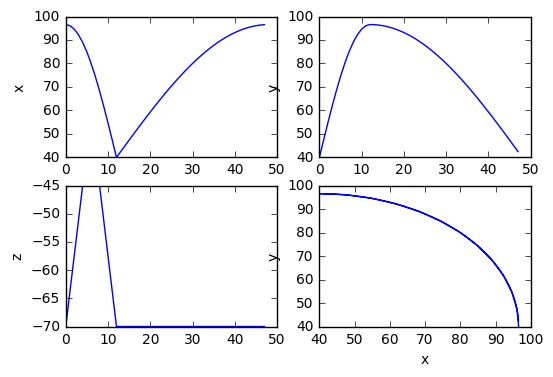

In [61]:
px = []
py = []
pz = []
for p in pos:
    px.append(p[0])
    py.append(p[1])
    pz.append(p[2])

plt.subplot(2,2,1)
plt.plot(px)
plt.ylabel('x')
plt.subplot(2,2,2)
plt.plot(py)
plt.ylabel('y')
plt.subplot(2,2,3)
plt.plot(pz)
plt.ylabel('z')
plt.subplot(2,2,4)
plt.plot(px,py)
plt.ylabel('y')
plt.xlabel('x')


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.